In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import random
import matplotlib.pylab as plt
import math
from random import randint
from scipy.stats import binom

### By using dense_gnm_random_graph we return G(n,m)

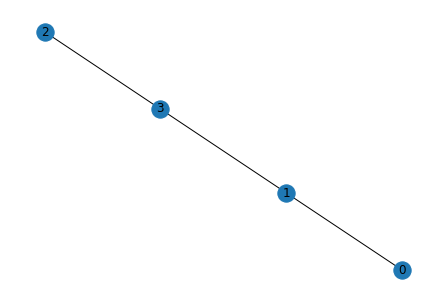

In [72]:
Gnm = nx.dense_gnm_random_graph(4,3)
nx.draw(Gnm, with_labels=True)
plt.show()

### To prove that if the probability of having just m links in a random network is = C(mMax , m) * p^m * (1-p)^(mMax - m)
#### first we know that the probability of having a link between 2 nodes is p^m then we know the probability of having link between other nodes except that node with a link is (1-p)^(mMax - m) and we know if we want to have just m links between this nodes we should use combine action which is C(m,mMax) that mMax is the number of existing nodes fr having a link

### Prob1

### As u see,it's obvious that the avrage degree for a node is = (2*m)/n in a G(n,m)

### Now it's time to prove it

#### if we assume m' as avrage of edges, and by using the reminded equaition pM(which is the probability of existing edge m) should be like this:
#### pM = C(m,  mMax = n*(n-1)/2) * p^(m) * (1-p)^(mMax - m)
### m' = Σ(from m = 0 to m = mMax)[m * pM] = mMax * p = n * (n-1)/2 * p
### So the average of degree for a node that was = 2 * m' / n    is   = p * (n-1)
### And the average of edges = C(n,2) * p

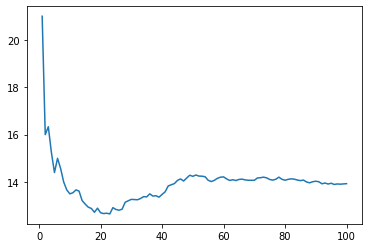

In [27]:
itr = 100
n = 10
p = 0.3
num_of_edges = []
avg_edg = []
sumedg = 0
for i in range(itr):
    Gnp = nx.erdos_renyi_graph(n,p)
    edges = Gnp.number_of_edges()
    num_of_edges.append(edges)
    avg_edg.append(np.mean(num_of_edges)) 
    

x = np.arange(1, itr + 1)
y = avg_edg

plt.plot(x,y)

#### As u see after 100 iteration the average of number of edges tend to C(n,2) * p = 9*10/2 * 0.3 = 13.5

### قانون اعداد بزرگ

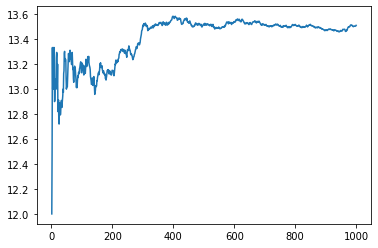

In [26]:
itr = 1000
n = 10
p = 0.3
num_of_edges = []
avg_edg = []
for i in range(itr):
    Gnp = nx.erdos_renyi_graph(n,p)
    edges = Gnp.number_of_edges()
    num_of_edges.append(edges)
    avg_edg.append(np.mean(num_of_edges)) 
    

x = np.arange(1, itr + 1)
y = avg_edg

plt.plot(x,y)

#### To make sure of our result we should extend our number of iterations and we saw again it tends to 13.5.

### Before this we proved that the average of degree for a node that was = 2 * m' / n is = p * (n-1)

### And the variance of degrees is sigma2 = p*(1-p)*(n-1)

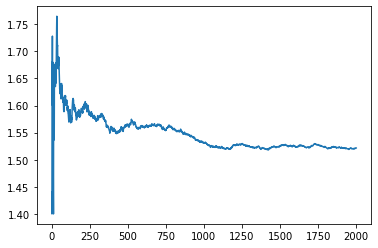

In [46]:
itr = 2000
n = 10
p = 0.3
var_deg = []
var_degree_t = []

for i in range(itr):
    Gnp = nx.erdos_renyi_graph(n,p)
    degrees = [val for (node, val) in Gnp.degree()]
    var_deg.append(np.var(degrees))
    var_degree_t.append(np.mean(var_deg))
    

x = np.arange(1, itr + 1)
y = var_degree_t

plt.plot(x,y)

### قانون اعداد بزرگ

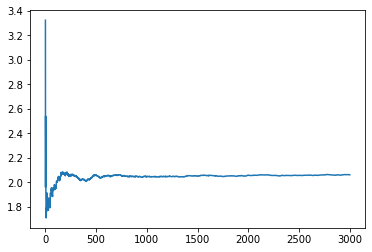

In [47]:
itr = 3000
n = 11
p = 0.5
var_deg = []
var_degree_t = []

for i in range(itr):
    Gnp = nx.erdos_renyi_graph(n,p)
    degrees = [val for (node, val) in Gnp.degree()]
    var_deg.append(np.var(degrees))
    var_degree_t.append(np.mean(var_deg))
    

x = np.arange(1, itr + 1)
y = var_degree_t

plt.plot(x,y)

### as u notice,both the plots tend to the exact number for variance

### Prob 2

### To prove that degree distribution in random graphs follows normal distribution shape:
#### 1. For a random network of N nodes, each node can have potentially N-1 links.
#### 2. The probability pk that a node has exactly k links is given by the binomial distribution: Pk = C(N-1,k) * p^k * (1-p)^(N-1-k)

#### Pk = Nk/N that Nk is the number of nodes with degree = k

### Poisson distribution = e^(- k') * k'^k / k! where k' is p * (N - 1) the average of degree

#### Stirling approximation : k! = (k/e)^k * sqrt(2*pi*k)  ==> Pk = e^(k- k') * (k'/k)^k / sqrt(2*pi*k)

#### now we should compute the limit of Pk as k tends to infinity : lim (k -> inf) {Pk} = 0 so for big expressions it decreases

In [93]:
n = 11
p = 0.3
Gnp = nx.erdos_renyi_graph(n,p)
sorted_deg = sorted([deg for n, deg in Gnp.degree()], reverse=True)
duplicate_dict = {i:sorted_deg.count(i) for i in sorted_deg}
print(duplicate_dict)
degree, count = zip(*duplicate_dict.items())
cnt = [x / n for x in count]
cnt

{6: 2, 4: 2, 3: 4, 2: 1, 1: 2}


[0.18181818181818182,
 0.18181818181818182,
 0.36363636363636365,
 0.09090909090909091,
 0.18181818181818182]

#### here (n-1)*p = k = 3

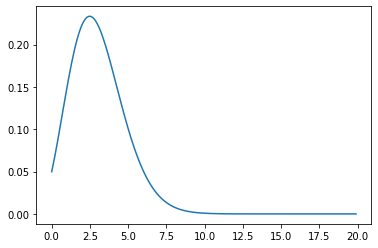

In [101]:
from scipy.stats import poisson
from scipy.special import factorial
k = 3
t = np.arange(0, 20, 0.1)
d = np.exp(-k)*np.power(k, t)/factorial(t)

plt.plot(t,d) 
plt.show()

#### but here we have (n-1)*p = k = 9

In [102]:
n = 11
p = 0.9
Gnp = nx.erdos_renyi_graph(n,p)
sorted_deg = sorted([deg for n, deg in Gnp.degree()], reverse=True)
duplicate_dict = {i:sorted_deg.count(i) for i in sorted_deg}
print(duplicate_dict)
degree, count = zip(*duplicate_dict.items())
cnt = [x / n for x in count]
cnt

{10: 3, 9: 8}


[0.2727272727272727, 0.7272727272727273]

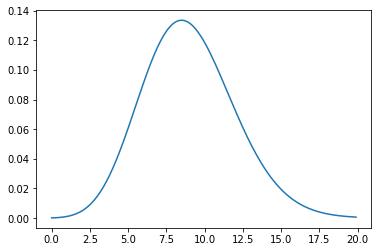

In [103]:
from scipy.stats import poisson
from scipy.special import factorial
k = 9
t = np.arange(0, 20, 0.1)
d = np.exp(-k)*np.power(k, t)/factorial(t)

plt.plot(t,d) 
plt.show()

### As u observe the skewness tends to the right side by incresing the probability 

### Prob 3

### To prove that Pc ~ log(n)/n

#### we used nx.erdos_renyi_graph

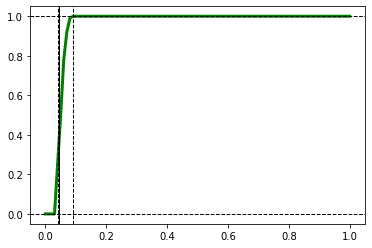

In [123]:
n = 100
p = 0.3
iters = 100
pconnect = []
n_connected_graphs = 0
Pc = np.linspace(0, 1, 100)
for p in Pc:
    n_connected_graphs = 0
    for i in range(iters):
        g = nx.erdos_renyi_graph(n, p)
        n_connected_graphs += int(nx.is_connected(g))
    pconnect.append(n_connected_graphs / iters)
    
for i in range(len(Pc)):
    if pconnect[i] == 0 and pconnect[i+1] != 0:
            pc_1 = Pc[i+1]
    if pconnect[i] != 1 and pconnect[i+1] == 1:
            pc_2 = Pc[i+1]
            
plt.plot(Pc,pconnect,linewidth=3, color='green')
plt.axvline(pc_1, color='black', linewidth=1, linestyle='dashed')
plt.axvline(pc_2, color='black',linewidth=1, linestyle='dashed')
pc = np.round(math.log(n, math.e)/n, 3) 
plt.axvline(pc, color='black',linewidth=1, linestyle='solid')
plt.axhline(0, color='black', linewidth=1,linestyle='dashed')
plt.axhline(1, color='black', linewidth=1,linestyle='dashed')

#### As u see pc where we defined it as np.round(math.log(n, math.e)/n, 3) behaves correctly.

#### based on our searches we found that Pc = log(n, math.e)/n which is ~ log(n,10)/n ; since Pc / log(10,math.e) = log(n,10)/n

### Prob 4

### Prove (1−xq)^n * (1−x)^(−n) =(1+x+x2+...+xq−1)^n :
#### at first we put p things in each plate so it is : X'1 + X'2 + ... + X'n = m − p*n  where X'i <= q − 1 and the answer of this equation is the coefficient of x^(m - p*n)
#### f(x) = ((1-x^q)/(1-x))^n = Σ(from l = 0 to l = n)[(-1)^l * C(l,n) * x^(l*q) * Σ(from j = 0 to j = inf)[C(n - 1, n - 1 + j) * x^j]] 
#### so m = p*n = l*q + j => j = m - p*n - l*q

### so the coefficient of x^(m - p*n) is : Σ(from l = 0 to l = n)[(-1)^l * C(l,n) * C(n - 1, n - 1 + j) = Σ(from l = 0 to l = n)[(-1)^l * C(l,n) * C( n - 1 , n + m - p*n - l * q - 1)

# G(n,p)

#### now we want to produce G(n,p),if we didn't want to use nx.erdos_renyi_graph

#### we should use fixed n nodes

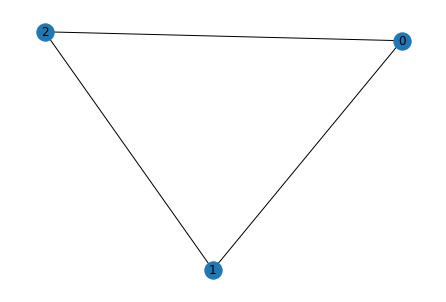

In [78]:
nodes = np.random.randint(2,20)
nodes = 3
edge_probability = 0.5
edges = []
edges_cnt = 0
for i in range(nodes):
    for j in range(i):
        prob = random.uniform(0, 1)
        if prob <= edge_probability:
            edges.append((i,j))
            edges_cnt += 1
G = nx.Graph()
G.add_nodes_from(list(range(0,nodes)))
G.add_edges_from(edges)
nx.draw(G,with_labels=True)

## Kimia Seddiqi 97243046   Reyhaneh Kharazmi 97243032